In [75]:
#导入所需要的库
import numpy as np
#处理数据
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
#绘图更加美观
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
#绘图工具
import matplotlib.pyplot as plt
#jupyter的工具，让绘图更好看
%matplotlib inline

from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew

#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
#机器学习工具
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
#划分数据集
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
#计算均方差
from sklearn.metrics import mean_squared_error
#用于数据标准化
from sklearn.preprocessing import StandardScaler
#决策树回归
from sklearn.tree import DecisionTreeRegressor
#梯度提升法
from sklearn import ensemble
#lasso模型
from sklearn.linear_model import Lasso
#支持向量机
from sklearn.svm import SVR
#K折验证法
from sklearn.model_selection import cross_val_score


In [26]:
#读取数据
df = pd.read_csv("housing.csv")
#拷贝一份数据，以免原有数据被破坏
df_copy = df.copy()

In [27]:
#查看数据
#查看前五行
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.58,4.98,15.30,504000.00
1,6.42,9.14,17.80,453600.00
2,7.18,4.03,17.80,728700.00
3,7.00,2.94,18.70,701400.00
4,7.15,5.33,18.70,760200.00


In [28]:
#查看尾五行
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.59,9.67,21.00,470400.00
485,6.12,9.08,21.00,432600.00
486,6.98,5.64,21.00,501900.00
487,6.79,6.48,21.00,462000.00
488,6.03,7.88,21.00,249900.00


In [29]:
#查看数据集属性描述,最好要有这一步!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


**发现里面并没有空值，不用另外处理**

In [30]:
#查看数值属性列的最大值，最小值，均值等特征
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.00,489.00,489.00,489.00
mean,6.24,12.94,18.52,454342.94
std,0.64,7.08,2.11,165340.28
min,3.56,1.98,12.60,105000.00
25%,5.88,7.37,17.40,350700.00
50%,6.18,11.69,19.10,438900.00
75%,6.58,17.12,20.20,518700.00
max,8.40,37.97,22.00,1024800.00


array([[<Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

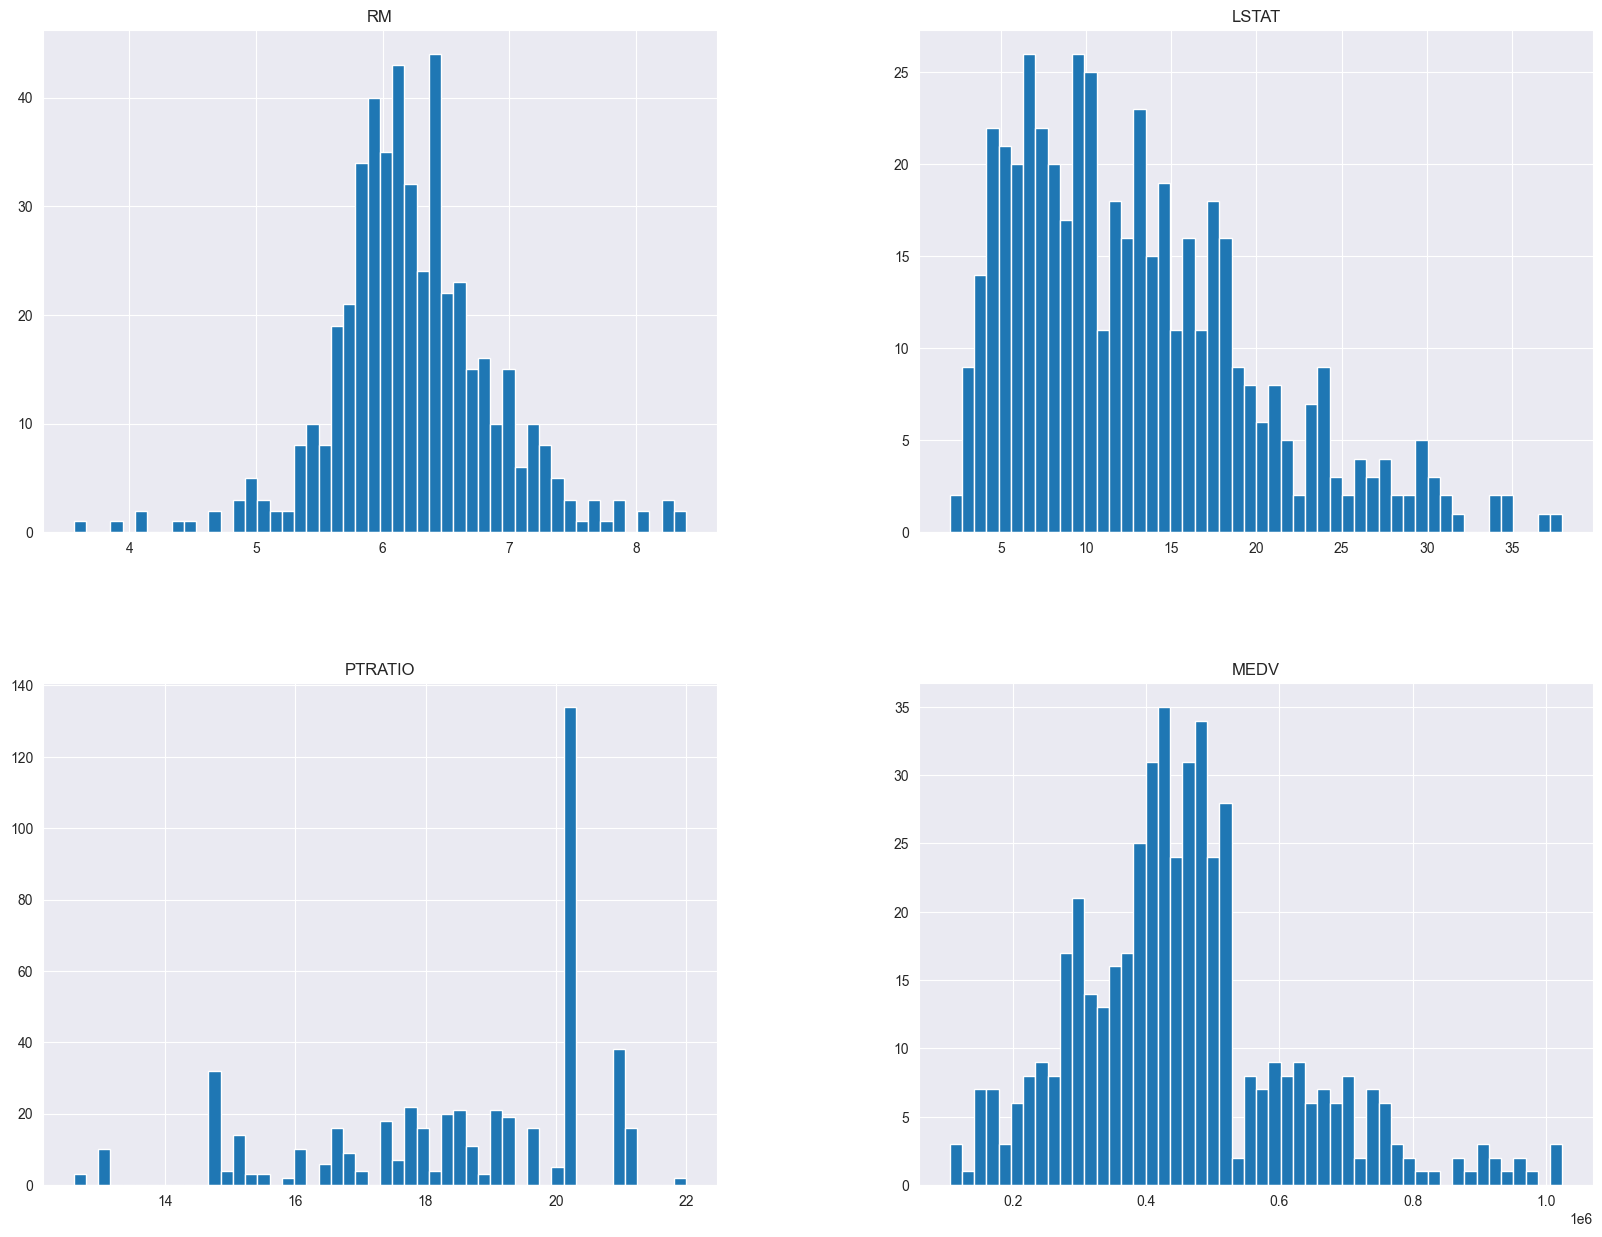

In [31]:
#查看各属性的各自的分布图案
df.hist(bins=50, figsize=(20,15))#bins代表直方图分区数量，figsize代表图像的宽高

In [32]:
#采用留出法划分数据集
train_data, test_data = train_test_split(df,train_size = 0.8,test_size=0.2, random_state=42)

In [33]:
#训练集
train_data.head()

,RM,LSTAT,PTRATIO,MEDV
325,5.87,9.80,20.20,409500.00
140,6.17,24.16,21.20,294000.00
433,6.75,17.44,20.20,281400.00
416,6.44,16.22,20.20,300300.00
487,6.79,6.48,21.00,462000.00


In [34]:
#训练集
train_data.head()

,RM,LSTAT,PTRATIO,MEDV
325,5.87,9.80,20.20,409500.00
140,6.17,24.16,21.20,294000.00
433,6.75,17.44,20.20,281400.00
416,6.44,16.22,20.20,300300.00
487,6.79,6.48,21.00,462000.00


In [35]:
#创建训练集的副本，防止原始训练集被伤害
train_copy = train_data.copy()

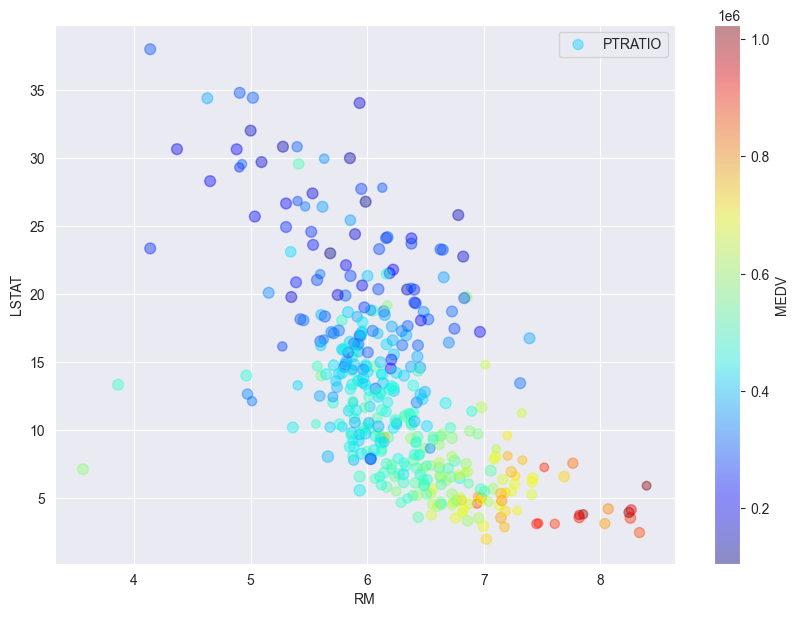

In [36]:
#分析训练集的数据，PTRATIO,LSTAT,RM与MEDV的整体关系
#房价分布, s-蓝色-PTRATION，c-颜色-价格-（蓝-红）
train_data.plot(kind = "scatter", x = "RM", y = "LSTAT", alpha = 0.4, 
             s = train_data["PTRATIO"]*3, label = "PTRATIO", figsize = (10,7), 
             c = "MEDV", cmap = plt.get_cmap("jet"), colorbar = True,
            )
plt.legend()


In [37]:
#计算每对属性的相关系数
corr_matrix = train_data.corr()
#每个属性与房价中位数的相关系数
corr_matrix["MEDV"].sort_values(ascending = False) 


MEDV       1.00
RM         0.71
PTRATIO   -0.53
LSTAT     -0.76
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='PTRATIO', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='LSTAT', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel='PTRATIO'>]], dtype=object)

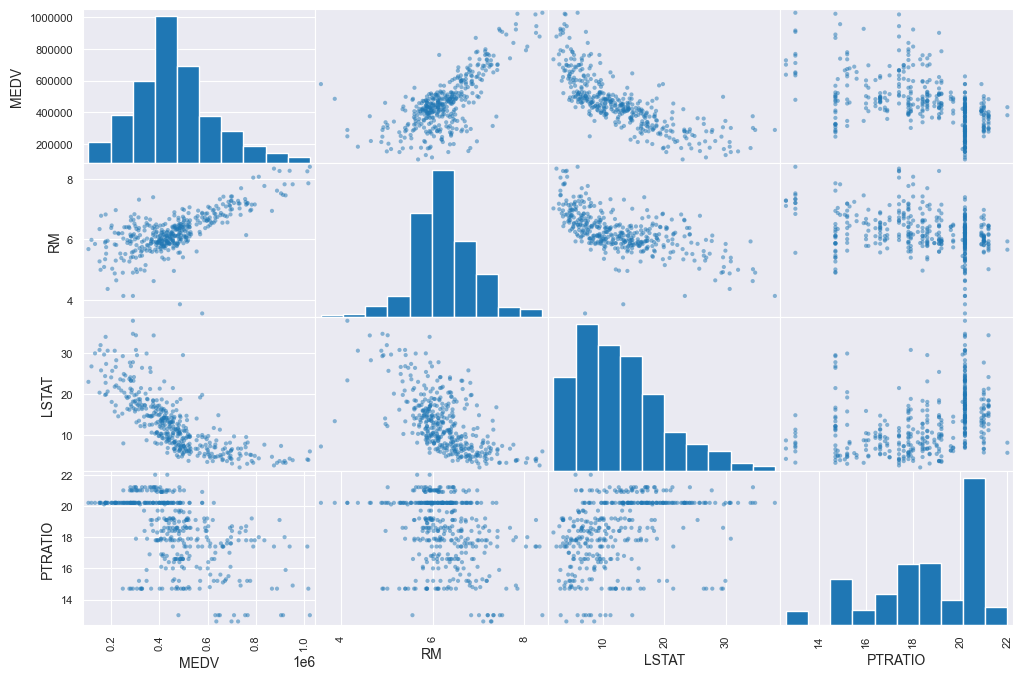

In [38]:
#查看变量因变量两俩之间的关系
attributes = ["MEDV", "RM", "LSTAT", "PTRATIO"]
scatter_matrix(train_data[attributes], figsize = (12,8))
#从图中看出RM、LSTAT与MEDV相关性比较强，与之前的计算相近

In [39]:
#进行数据清洗
#首先查看数据类型,都是数值类型特征
train_data.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [40]:
#没有异常的值
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 325 to 102
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       391 non-null    float64
 1   LSTAT    391 non-null    float64
 2   PTRATIO  391 non-null    float64
 3   MEDV     391 non-null    float64
dtypes: float64(4)
memory usage: 15.3 KB


In [41]:
#干净的训练集：预测器和标签分开，因为两者进行数据转换的方式不同。
housing  = train_data.drop("MEDV", axis = 1)#housing数据副本 只包含预测器（3列），不含标签
housing_labels = train_data["MEDV"].copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 325 to 102
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       391 non-null    float64
 1   LSTAT    391 non-null    float64
 2   PTRATIO  391 non-null    float64
dtypes: float64(3)
memory usage: 12.2 KB


In [42]:
# 模型实例化
le = LinearRegression()
# 拟合过程，梯度下降法
le.fit(housing, housing_labels)
# 得到回归系数
coef1 = le.coef_  # 3个回归系数

In [43]:
#打印回归系数
print(coef1)

[ 87322.20361861 -10620.63731522 -19324.4102965 ]


In [44]:
#测试集的处理
housing_test = test_data.drop("MEDV",axis = 1)
housing_test_labels = test_data["MEDV"].copy()

In [45]:
#对测试集进行测试
predict1 = le.predict(housing_test)

In [46]:
#显示测试结果
predict1[:5]

array([342593.79029768, 506257.0916297 , 410499.93166174, 237792.7411537 ,
       327005.79653234])

In [47]:
#得分显示
#MSE （Mean Squared Error）是指预测值与实际值的平方差之和，公式为： MSE = ∑(y_hat – y)^2 / n， 其中 n 是样本总数。
# 得分
print("Score：", le.score(housing_test, housing_test_labels))
print("RSME：", np.sqrt(mean_squared_error(housing_test_labels, predict1)))

Score： 0.6910934003098509
RSME： 82395.54332162568


In [48]:
#对应的回归系数
#创建一个空 DataFrame，并将其命名为 le_df，然后添加一个名为 'name' 的列，并填充 X 列表的列名，
#接着添加 'coef' 列，并将 coef1 变成向量化的一维数组。最后返回的就是表格的形式
le_df = pd.DataFrame()

le_df["name"] = housing_test.columns.tolist()
le_df["coef"] = coef1.reshape(-1,1)#转换原来向量为矩阵

le_df


,name,coef
0,RM,87322.20
1,LSTAT,-10620.64
2,PTRATIO,-19324.41


In [49]:
#真实值与预测值的对比
train_test_comp = pd.DataFrame({"test": housing_test_labels.tolist(),
                         "pre": predict1.flatten()
                        })
print(train_test_comp)

        test       pre
0  401100.00 342593.79
1  501900.00 506257.09
2  319200.00 410499.93
3  147000.00 237792.74
4  247800.00 327005.80
..       ...       ...
93 405300.00 487964.06
94 289800.00 397345.91
95 518700.00 569811.90
96 422100.00 463015.87
97 151200.00 270976.11

[98 rows x 2 columns]


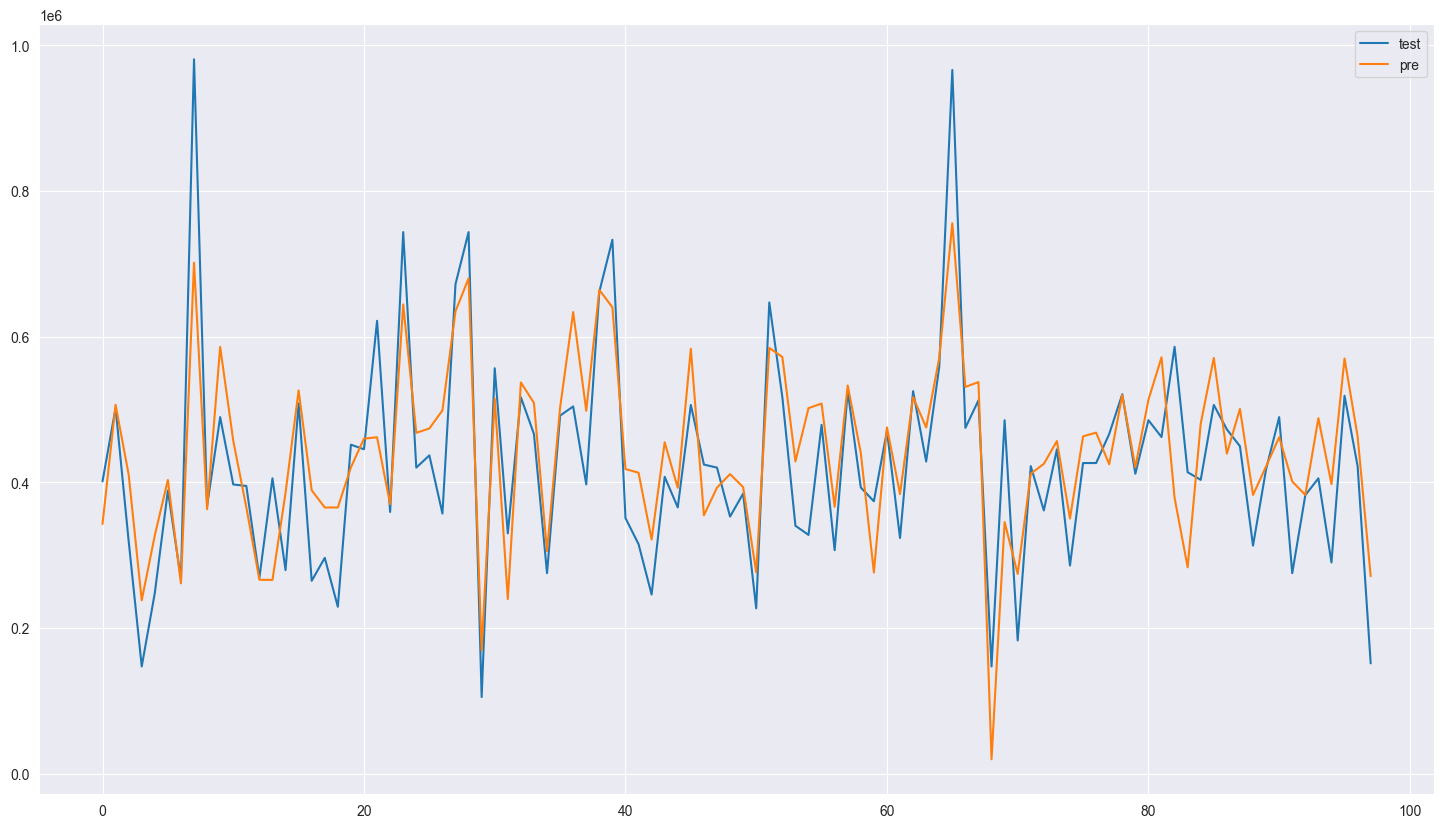

In [50]:
#预测结果对比折线图
train_test_comp.plot(figsize=(18,10))
plt.show()
#下图蓝色的是预测值，黄色的是实际值

In [51]:
#真实值 < 实际值
len(train_test_comp.query("test<pre")) / len(train_test_comp)

0.6938775510204082

In [52]:
#阶段性结论
#发现模型预测的结果大约70%是测试房价大于实际房价
#房价的数据整体是很干净的没有过多噪音，比如值的格式错误，值缺失，没有较多涉及特征工程的操作。并且特征值的属性都是数值，也比较容易处理

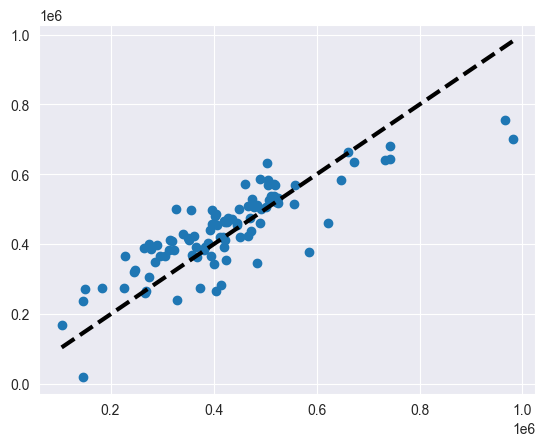

In [53]:
#模型评价
#在测试集上面的整体评价,将真实值和预测值的散点分布图画在坐标轴上
#横坐标housing_test_labels，纵坐标predict1
plt.scatter(housing_test_labels, predict1, label="test")
#绘制直线
plt.plot([housing_test_labels.min(), housing_test_labels.max()],
         [housing_test_labels.min(), housing_test_labels.max()],
         'k--',
         lw=3,
         label="predict"
        )

plt.show()


In [54]:
#根据上图可以发现在0.2*10^6 ~ 0.6*10^6的范围内预测较为准确
#超过0.6*10^6之后，预测值要比较小

In [55]:
#整体数据集上面分析
all_data_x = df_copy.drop("MEDV",axis=1)
all_data_y = df_copy[["MEDV"]]
all_data_y.head()

,MEDV
0,504000.00
1,453600.00
2,728700.00
3,701400.00
4,760200.00


In [56]:
#重新在整体上面建模
predict_all = le.predict(all_data_x)
print("Score：", le.score(all_data_x,all_data_y ))  # 统一换成整体数据集
print("RSME：", np.sqrt(mean_squared_error(all_data_y, predict_all)))

Score： 0.7171305906006962
RSME： 87847.04067318552


In [57]:
#比较整体数据集上的真实值和预测值
all_pre = pd.DataFrame({"test": all_data_y["MEDV"].tolist(),
                         "pre": predict_all.flatten()
                        })
print(all_pre)

         test       pre
0   504000.00 633616.89
1   453600.00 527676.40
2   728700.00 648662.02
3   701400.00 626517.29
4   760200.00 614144.97
..        ...       ...
484 470400.00 475228.76
485 432600.00 440191.54
486 501900.00 551474.34
487 462000.00 526660.36
488 249900.00 445077.30

[489 rows x 2 columns]


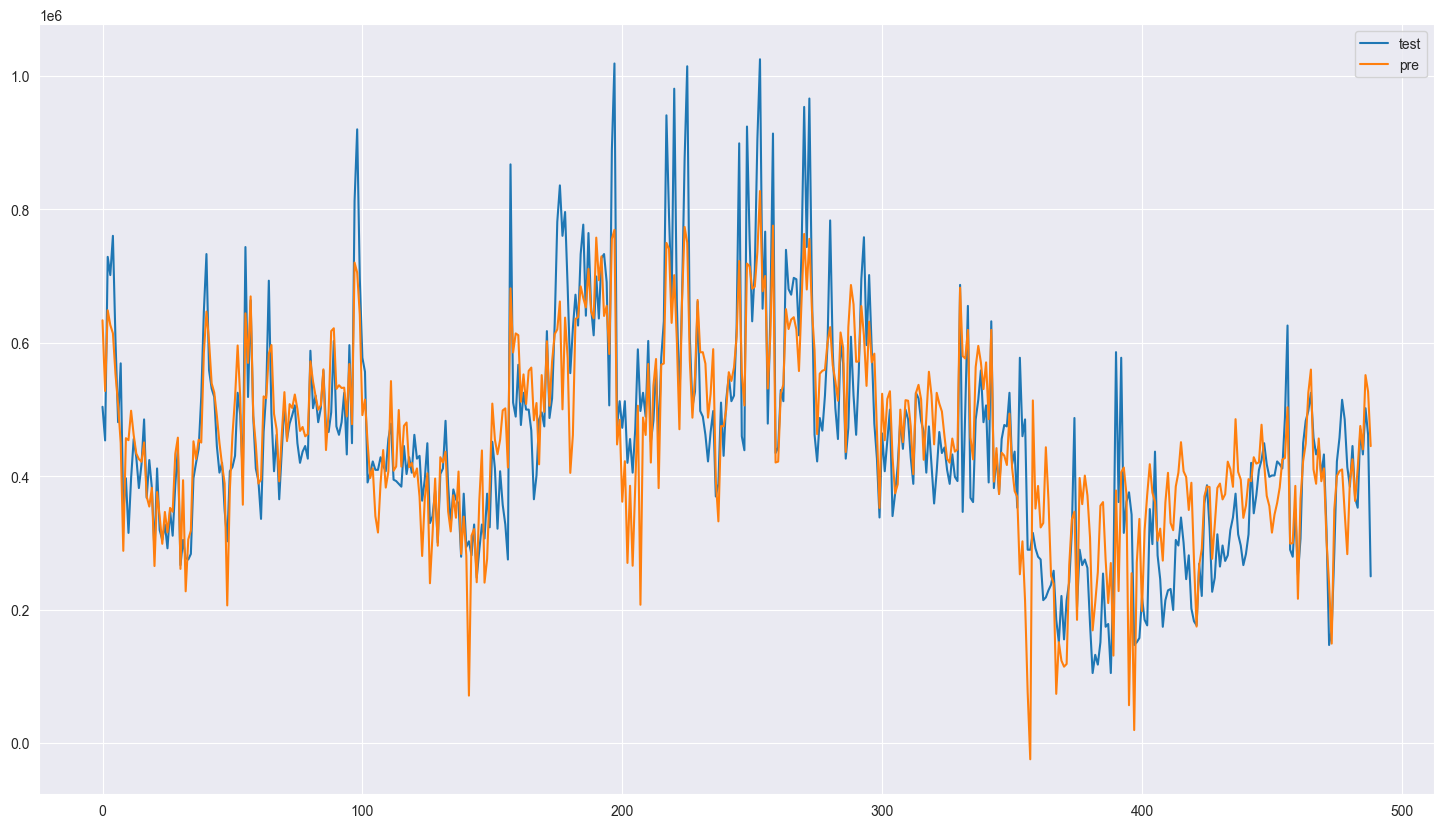

In [58]:
#折线图对比，更加清晰
all_pre.plot(figsize=(18,10))
plt.show()

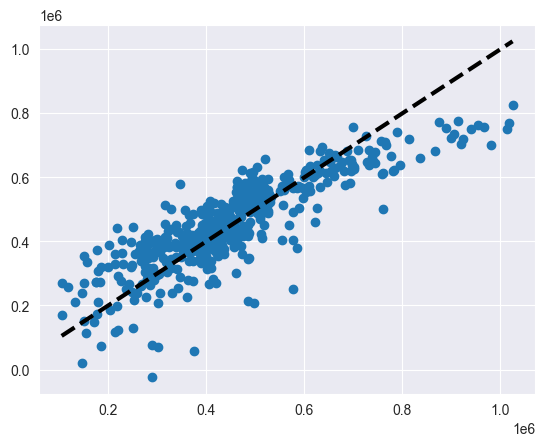

In [59]:
#同样把整体的真实值与预测值的散点图画出来
plt.scatter(all_data_y, predict_all, label="y_all")
plt.plot([all_data_y.min(), all_data_y.max()],
         [all_data_y.min(), all_data_y.max()],
         'k--',
         lw=3,
         label="all_predict"
        )

plt.show()

In [60]:
#在整体上看来在0.2*10^6~0.7*10^6的范围内比较准确，超过0.7*10^6也是预测值比较小

In [61]:
#模型的优化
#1、数据归一化。使用 sklearn 中的 StandardScaler 可以将数值特征归一化到 [-1, 1] 范围内。归一化的目的是为了消除特征之间的差异，使模型收敛更快，提高训练效率。
#要注意的是，当输入数据分布范围很大的时候可以使用归一化，以防止过大或过小的值影响到模型的学习。把所有的数值特征都缩放到相同的尺度上；平移数据，使其均值为0；
#拉伸数据使其变化范围变大。
# 实例化
ss = StandardScaler()
# 特征数据
X = ss.fit_transform(all_data_x)
# 目标变量
y = ss.fit_transform(all_data_y)
# 先切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
#学习曲线
def plot_learning_curve(algo,X_train,X_test,y_train,y_test):
    train_score = []
    test_score = []

    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict )) 

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))

    plt.plot([i for i in range(1,len(X_train)+1)], np.sqrt(train_score),label = 'Train')
    plt.plot([i for i in range(1,len(X_train)+1)], np.sqrt(test_score),label = 'Test')
    plt.legend()
    plt.axis([0,len(X_train)+1,0,4])
    plt.show()

In [63]:
#查看训练集
print(X_train)

[[-0.57743914 -0.44378023  0.79817433]
 [-0.10309369  1.58597496  1.2723085 ]
 [ 0.79116414  0.63611738  0.79817433]
 ...
 [-0.19951801 -0.03811189  0.79817433]
 [ 0.08819973  0.61208824  0.79817433]
 [ 0.25616467 -0.32646152  1.13006825]]


Score:0.6911
RMSE:0.4988


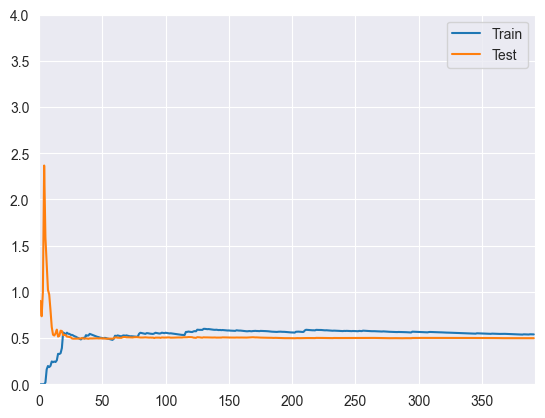

In [64]:
#线性拟合,(较上面的补充学习曲线)
Le = LinearRegression()
Le.fit(X_train,y_train)
Le_pre = Le.predict(X_test)
# 模型评分 
print('Score:{:.4f}'.format(Le.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,Le_pre))))
plot_learning_curve(Le,X_train,X_test,y_train,y_test)

In [65]:
#K折验证法
#评分函数
def display_scores(scores):
    print("Scores:")
    print(pd.Series(scores).mean())
#线性模型的评分：
lin_scores = cross_val_score(Le,X, y,scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("LinearRegression")
display_scores(lin_rmse_scores)

LinearRegression
Scores:
0.5558948933250007


In [66]:
#决策树回归
tr = DecisionTreeRegressor(max_depth=2) 
#进行拟合
tr.fit(X_train, y_train) 
# 预测值 
tr_pre = tr.predict(X_test)

# 模型评分 
print('Score:{:.4f}'.format(tr.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,tr_pre))))

Score:0.6817
RMSE:0.5063


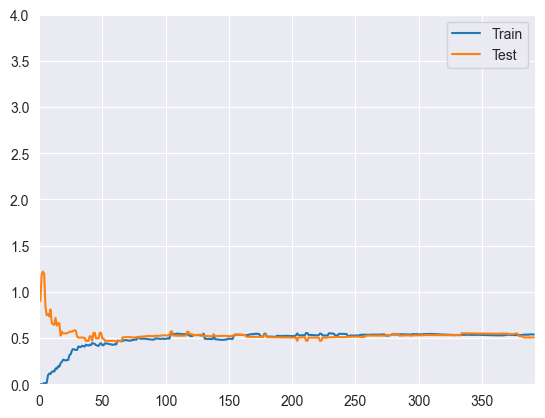

In [67]:
plot_learning_curve(tr,X_train,X_test,y_train,y_test)
#横轴样本量，纵轴RMSE

In [68]:
#梯度提升法GradientBoosting
#对每个预测进行弱学习器的加权组合，形成更强的模型，由多个弱分类器组成。它通过梯度下降法迭代构建子模型来拟合残差，最后将各个子模型的结果进行叠加
gb = ensemble.GradientBoostingRegressor()

gb.fit(X_train, y_train)
gb_pre=gb.predict(X_test) 

# 模型评分 
print('Score:{:.4f}'.format(gb.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,gb_pre))))

Score:0.8476
RMSE:0.3504


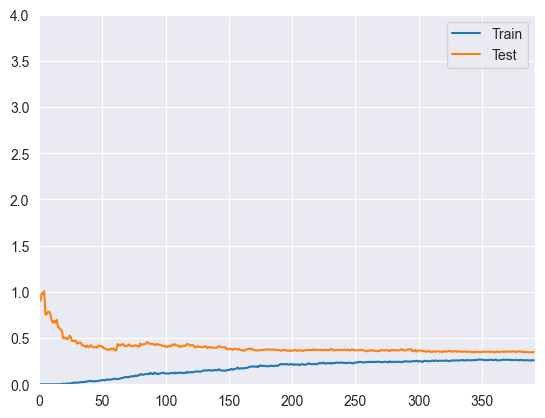

In [69]:
#梯度上升法的学习曲线
plot_learning_curve(gb,X_train,X_test,y_train,y_test)

In [70]:
#这个显而易见预测的效果更好

In [71]:
#支持向量回归
linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)
linear_svr_pre = linear_svr.predict(X_test)

# 模型评分 
print('Score:{:.4f}'.format(linear_svr.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,linear_svr_pre))))

Score:0.6903
RMSE:0.4995


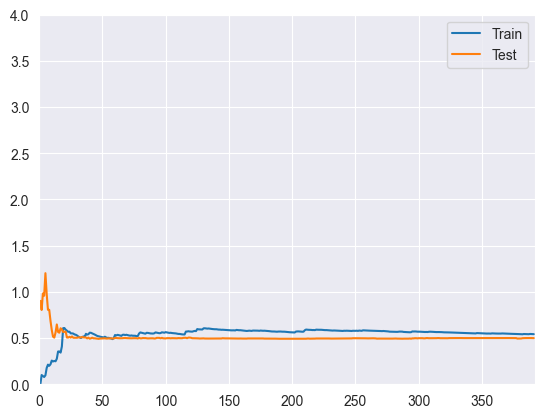

In [72]:
#这个的效果和梯度下降的多元回归模型相差不大
#学习曲线
plot_learning_curve(linear_svr,X_train,X_test,y_train,y_test)

In [73]:
#采用不同模型进行建模后发现采用Gradient Boosting 算法的话，效果是最好的。最终的评分高达0.8465